<h1 style="text-align:center">
    Movies
</h1>

<br>

<font color="darkblue">

<h3 style="text-align:center">
    Pablo Fernández Lucas
</h3>
    
<h3 style="text-align:center">
    14/11/2024
</h3>

<hr>

# Introducción

<br>

En este proyecto se desarrolla en Python un análisis básico de datos sobre películas de cine de IMDB.
El set de datos que vamos a usar inicialmente se encuentra en la siguiente página:

https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

En ella puede encontrarse información más detallada, así como una descripción precisa de cada columna.

<font color="green">
Seguidamente, te toca a ti hacer una breve introducción, completando el fragmento de letra en azul y desarrollándolo a tu antojo. Suprime después este fragmento en verde.
</font>

<br>

Se plantean los apartados iniciales para su resolución *sin usar la libreria pandas*. Esto se propone así para forzar a practicar con las técnicas, herramientas y conceptos básicos de Python. Más adelante, hay otros apartados propuestos para su resolución con esta librería y otras.

<br>

<font color="darkblue">
A partir de los datos proporcionados, he conseguido ... pero no he podido ...

<br>

Aunque al final de este notebook detallaré la calificación que calculo honestamente, globalmente, siguiendo las puntuaciones que se asigna a cada apartado, diría que he obtenido una nota de *** sobre 10.
</font>

<br>

<font color="green">
Completa tus datos personales en la cabecera, bajo el rótulo inicial. Completa también el breve apartado anterior, con texto  azul, y pon en azul todos los comentarios tuyos, dejando en negro los míos, del enunciado. También, suprime los fragmentos en verde, como éste, que son indicaciones pero que, una vez atendidas, deben desaparecer de la solución que entregas.
</font>

# Datos de partida

(**Nota previa:** hasta el apartado específico de dataframes, se deben desarrollar las soluciones a los ejercicios propuestos sin usar la librería `pandas`, justamente para obligar a practicar con conceptos básicos de Python.)

Nuestra tabla de datos es el archivo de texto `movie_data.csv` que se encuentra en la carpeta `data_in`, y puede verse así con cualquier editor:

<br>

<center>
    <img src="./images/texto.png" width="100%">
</center>

La primera fila es la cabecera.
Esta fila cabecera contiene los nombres de los campos, separados por comas.
Yo la he marcado en azul para distinguirla fácilmente de las demás filas, que contienen los datos propiamente dichos,
esto es, los valores de dichos campos, consignando los datos de cada película en cada línea.

Si abrimos esta tabla con *excell* (importar datos csv con el separador `,`), vemos cada dato en una celda.

<br>

<center>
    <img src="./images/csv_1.png" width="100%">
</center>

<br>

Mostramos la hoja excell en dos imágenes por ser muy ancha.

<br>

<center>
    <img src="./images/csv_2.png" width="100%">
</center>

# Librerías y constantes globales

<br>

Pongamos todas las librerías necesarias al principio, tal como propone el estilo `pep-8`. Ej.:
<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>.
    
De paso, en éste y otros lugares de Internet podrás encontrar detalles sobre estilo y presentación de código con un estilo estándar y cuidado. Examina esta página y trata de seguir esas indicaciones.

In [315]:
# Librerías:
import csv
from typing import Dict, Tuple, List
from collections import defaultdict
import matplotlib.pyplot as plt
from typing import List, Tuple, Optional
from bs4 import BeautifulSoup
import requests
import pandas as pd




In [316]:
# Constantes globales:
MOVIES_DATA = './data_in/movie_data.csv'
MAIN_HEADERS =  ['movie_title', 'title_year', 'director_name', 
                'actor_1_name', 'language', 'country', 
                'color', 'budget', 'imdb_score', 'movie_imdb_link']
FEW_FIELDS = "algunos_campos.txt"



# Parte A. Ejercicios básicos sin usar `pandas` [2 puntos]

Esta parte inicial debe realizarse sin usar la librería `pandas`. Para practicar con esta librería, se plantean otros apartados más abajo.

### A.1. Exploración inicial básica del archivo de datos

Deseamos cargar el archivo de datos, que tiene un formato `csv`.
En este apartado, te recomiendo fuertemente usar la librería `cvs`,
que deberás importar en la primera celda del script, más arriba, no aquí.
(En los siguientes apartados, ya no mencionaré qué librerías usar
ni recordaré dónde se han de importar.)

Observa también que el test de funcionamiento te da el nombre de la función que deber definir
y algún otro identificador como es, por ejemplo, la constante `MOVIES_DATA`,
que debes definir también más arriba, en la segunda celda de este script.

Finalmente, observando el test, verás que se carga por separado la cabecera y las filas de datos.

In [317]:
import csv

def load_full_data(path: str) -> Tuple[List[str], List[List[str]]]:
    """
    Carga un archivo CSV y devuelve la cabecera y los datos.

    Parameters:
    path (str): La ruta del archivo CSV.

    Returns:
    Tuple[List[str], List[List[str]]]: Una tupla con la cabecera y los datos del archivo.
    """
    try:
        # Abrimos el archivo CSV con encoding 'utf-8' para asegurar compatibilidad con caracteres especiales.
        with open(path, 'r', encoding='utf-8') as csvfile:
            reader = list(csv.reader(csvfile))  # Leemos todo el archivo y lo convertimos a una lista.
            full_header = reader[0]  # La primera fila contiene la cabecera.
            full_list_data = reader[1:]  # El resto de las filas contienen los datos.
            return full_header, full_list_data
    except FileNotFoundError:
        # Captura si el archivo no se encuentra.
        print(f'Error: El archivo {path} no se encuentra.')
        return [], []
    except csv.Error as e:
        # Captura errores relacionados con el formato CSV.
        print(f'Error de CSV: {e}')
        return [], []
    except UnicodeDecodeError as e:
        # Captura errores de decodificación del archivo.
        print(f'Error de decodificación: {e}')
        return [], []



In [318]:
# Test de funcionamiento

full_header, full_list_data = load_full_data(path= MOVIES_DATA)

print(full_header)
print()
print(full_list_data[0:5])

['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

[['Color', 'James Cameron', '723', '178', '0', '855', 'Joel David Moore', '1000', '760505847', 'Action|Adventure|Fantasy|Sci-Fi', 'CCH Pounder', 'Avatar\xa0', '886204', '4834', 'Wes Studi', '0', 'avatar|future|marine|native|paraplegic', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', '3054', 'English', 'USA', 'PG-13', '237000000', '2009', '936', '7.9', '1.78', '33000'], ['Color', 'Gore Verbinski', '302', '169', '563', '1000', 'Orlando Bloom', '40000', '309404152', 'Action|Adventure|F

Ahora, querríamos ver las posiciones de los identificadores de los campos, dados en la línea cabecera.

In [319]:
# Esta celda debe ser completada por el estudiante

# Creamos una nueva lista enumerando los atributos de la cabecera previamente definida.
list_of_enumerated_headers = [(index, variable) for index, variable in enumerate(full_header)]



In [320]:
# Test de funcionamiento

print(list_of_enumerated_headers)

[(0, 'color'), (1, 'director_name'), (2, 'num_critic_for_reviews'), (3, 'duration'), (4, 'director_facebook_likes'), (5, 'actor_3_facebook_likes'), (6, 'actor_2_name'), (7, 'actor_1_facebook_likes'), (8, 'gross'), (9, 'genres'), (10, 'actor_1_name'), (11, 'movie_title'), (12, 'num_voted_users'), (13, 'cast_total_facebook_likes'), (14, 'actor_3_name'), (15, 'facenumber_in_poster'), (16, 'plot_keywords'), (17, 'movie_imdb_link'), (18, 'num_user_for_reviews'), (19, 'language'), (20, 'country'), (21, 'content_rating'), (22, 'budget'), (23, 'title_year'), (24, 'actor_2_facebook_likes'), (25, 'imdb_score'), (26, 'aspect_ratio'), (27, 'movie_facebook_likes')]


### A.2. Campos principales de una película

Los campos (columnas) del archivo son demasiados. No nos interesan todos ellos. Dada una lista con todos los campos, se pide extraer otra lista sólo con los campos con los que vamos a trabajar en los siguientes apartados: `movie_title`, `title_year`, `director_name`, `actor_1_name`, `language`, `country`, `color`, `budget`, `imdb_score` y `movie_imdb_link`.

In [321]:

# Calculamos las posiciones de los atributos asociados a la constante MAIN_HEADERS.
main_headers_index = [
    item[0] for item in list_of_enumerated_headers if item[1] in MAIN_HEADERS
]

# Función que extrae los datos principales de una fila según los índices en main_headers_index.
def main_data_from_item(row: list) -> list:
    """
    Extrae los datos principales de una fila basada en los índices de los atributos seleccionados.

    Parameters:
    row (list): Lista con los valores de una fila.

    Returns:
    list: Lista de los valores seleccionados según los índices en main_headers_index.
    """
    return [item for index, item in enumerate(row) if index in main_headers_index]



In [322]:
# Test de funcionamiento

print(main_data_from_item(full_header))

print()

datos_avatar_2009 = main_data_from_item(full_list_data[0])
print(datos_avatar_2009)

print()

datos_star_wars_7 = main_data_from_item(full_list_data[4])
print(datos_star_wars_7)

['color', 'director_name', 'actor_1_name', 'movie_title', 'movie_imdb_link', 'language', 'country', 'budget', 'title_year', 'imdb_score']

['Color', 'James Cameron', 'CCH Pounder', 'Avatar\xa0', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', 'English', 'USA', '237000000', '2009', '7.9']

['', 'Doug Walker', 'Doug Walker', 'Star Wars: Episode VII - The Force Awakens\xa0            ', 'http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1', '', '', '', '', '7.1']


### A.3. Algunos ajustes en los campos

Observa la anomalía en el string del título de la película. También, queremos tratar algunos campos como numéricos, ya sea enteros (el año y el presupuesto) o reales (la valoración). (Algunos campos numéricos enteros están vacíos en el archivo de datos; para ellos, el valor imputado será `-1`.) Además, en las urls de las películas no necesitaremos el fragmento final, iniciado con `?ref_`.

In [323]:
# Esta celda debe ser completada por el estudiante

# setType, dado un número en cadena, lo convierte a entero o flotante según corresponda.
def setType(item: str):
    """
    Convierte un número en cadena a su tipo adecuado (int o float). Si no es un número, lo devuelve tal cual.
    
    Parameters:
    item (str): El valor en forma de cadena.

    Returns:
    int, float o str: El valor convertido a entero, flotante o se devuelve sin cambios.
    """
    try:
        return int(item)
    except ValueError:
        try:
            return float(item)
        except ValueError:
            return item

# datatypes_arranged, limpia los datos de una fila y ajusta sus tipos.
def datatypes_arranged(row: list) -> list:
    """
    Limpia y convierte los tipos de datos en una fila. Reemplaza los valores vacíos por -1, 
    elimina las partes que siguen a '?ref_' o '\xa0', y convierte los datos a su tipo correcto.
    
    Parameters:
    row (list): Lista de valores de una fila.

    Returns:
    list: Lista con los valores limpios y ajustados a sus tipos.
    """
    new_row = [
        -1 if item == '' else setType(item.split('?ref_')[0].split('\xa0')[0]) 
        for item in row
    ]
    return new_row




In [324]:
# Test de funcionamiento

print(datatypes_arranged(datos_avatar_2009))

print(datatypes_arranged(datos_star_wars_7))


['Color', 'James Cameron', 'CCH Pounder', 'Avatar', 'http://www.imdb.com/title/tt0499549/', 'English', 'USA', 237000000, 2009, 7.9]
[-1, 'Doug Walker', 'Doug Walker', 'Star Wars: Episode VII - The Force Awakens', 'http://www.imdb.com/title/tt5289954/', -1, -1, -1, -1, 7.1]


### A.4. Recuperación de alguna información básica

<br>

Diseña funciones para recuperar la siguiente información:

<itemize>
    <li> El conjunto de valores posibles del campo `Color`.
    <li> Los títulos de película de nuestro archivo (limpios de caracteres extraños),
        junto con la cantidad de calificadores (un entero), que contengan la subcadena "Victor".
</itemize>

In [325]:
full_header.index('movie_title')

11

In [326]:
# Esta celda debe ser completada por el estudiante

# Índices de los atributos 'movie_title' y 'num_critic_for_reviews'
title_index = full_header.index('movie_title')
calification_index = full_header.index('num_critic_for_reviews')

# Agrupamos los valores únicos de la primera columna usando set
def group_by_colors() -> List[str]:
    """
    Agrupa y devuelve una lista de valores únicos de la primera columna de los datos.
    """
    return list(set(item[0] for item in full_list_data))

# Seleccionamos las películas con 'Victor' en el título y redondeamos su calificación
def victor_films_colors() -> List[Tuple[str, int]]:
    """
    Filtra las películas que contienen 'Victor' en el título y redondea su calificación.
    
    Returns:
    List[Tuple[str, int]]: Lista de tuplas con título de película y calificación redondeada.
    """
    return [
        (item[title_index].split('\xa0')[0], round(float(item[calification_index])))
        for item in full_list_data if 'Victor' in item[title_index]
    ]

# Listas resultantes
colores = group_by_colors()
pelis_victor = victor_films_colors()



In [327]:
# Test de funcionamiento

print(colores)
print(pelis_victor)

['', 'Color', ' Black and White']
[('Victor Frankenstein', 159), ('Victor Frankenstein', 159), ('The Young Victoria', 188), ('Victor Frankenstein', 159), ('Raising Victor Vargas', 59)]


# B Datos en un diccionario [2 puntos]

### B.1. Carga únicamente de datos que vamos a usar

En lugar de cargar *todos* los datos del archivo, luego generar otro archivo con los datos que nos interesan y luego ajustarlos, es mejor diseñar una función que recorre el archivo de datos y, de cada línea del archivo, *únicamente* retiene la parte que nos interesa, cargando la cabecera por un lado y, por otro, la lista de datos de interés, ajustados como ya hemos dicho.

Cargaremos esta información en un diccionario, cuyas claves serán pares `(título, año)` y cuyos valores se recogen en una lista con el resto de los campos.

Además, los datos de cada película tras la clave `(título, año)` están repetidas en el archivo de datos, con todos los datos idénticos; y lo que es peor: alguna que está repetida, pero con algún dato distinto. En ambos casos, para simplificar, adoptamos el criterio de registrar únicamente la primera aparición de los datos de una misma película y año.

In [328]:
# Esta celda debe ser completada por el estudiante


def load_main_data(path: str) -> Tuple[List[str], Dict[Tuple[str, int], List]]:
    """
    Carga los datos principales de un archivo CSV, estructurándolos en un diccionario.

    Parameters:
    path (str): Ruta del archivo CSV.

    Returns:
    Tuple[List[str], Dict[Tuple[str, int], List]]:
        - Una lista con los atributos principales (header).
        - Un diccionario con las películas, donde las claves son tuplas (título, año) y los valores son listas
          con los atributos relevantes.
    """
    try:
        with open(path, mode='r', encoding='utf-8') as file:
            # Leemos todo el archivo y lo convertimos en una lista
            file_list = list(csv.reader(file))
            
            # Seleccionamos solo los atributos principales del header
            header = main_data_from_item(file_list[0])
            title_index = header.index('movie_title')
            year_index = header.index('title_year')
            
            # Diccionario para almacenar los datos de las películas
            film_dic = {}
            
            # Recorremos todas las filas, excluyendo la cabecera
            for row in file_list[1:]:
                # Limpiamos y seleccionamos solo los datos relevantes de la fila
                row_clean = datatypes_arranged(main_data_from_item(row))
                key = (row_clean[title_index], row_clean[year_index])
                
                # Añadimos al diccionario solo si no existe la clave
                if key not in film_dic:
                    value = [item for index, item in enumerate(row_clean) 
                            if index not in {title_index, year_index}]
                    film_dic[key] = value
            
            return header, film_dic
    except FileNotFoundError:
        # Captura si el archivo no se encuentra.
        print(f'Error: El archivo {path} no se encuentra.')
        return [], []
    except csv.Error as e:
        # Captura errores relacionados con el formato CSV.
        print(f'Error de CSV: {e}')
        return [], []
    except UnicodeDecodeError as e:
        # Captura errores de decodificación del archivo.
        print(f'Error de decodificación: {e}')
        return [], []


In [329]:
# Test de funcionamiento

main_header, main_dict_data = load_main_data(MOVIES_DATA)

print(main_header)
print()
for title_year, pieces in list(main_dict_data.items())[:5]:
    print(title_year, " -> ", pieces)

['color', 'director_name', 'actor_1_name', 'movie_title', 'movie_imdb_link', 'language', 'country', 'budget', 'title_year', 'imdb_score']

('Avatar', 2009)  ->  ['Color', 'James Cameron', 'CCH Pounder', 'http://www.imdb.com/title/tt0499549/', 'English', 'USA', 237000000, 7.9]
("Pirates of the Caribbean: At World's End", 2007)  ->  ['Color', 'Gore Verbinski', 'Johnny Depp', 'http://www.imdb.com/title/tt0449088/', 'English', 'USA', 300000000, 7.1]
('Spectre', 2015)  ->  ['Color', 'Sam Mendes', 'Christoph Waltz', 'http://www.imdb.com/title/tt2379713/', 'English', 'UK', 245000000, 6.8]
('The Dark Knight Rises', 2012)  ->  ['Color', 'Christopher Nolan', 'Tom Hardy', 'http://www.imdb.com/title/tt1345836/', 'English', 'USA', 250000000, 8.5]
('Star Wars: Episode VII - The Force Awakens', -1)  ->  [-1, 'Doug Walker', 'Doug Walker', 'http://www.imdb.com/title/tt5289954/', -1, -1, -1, 7.1]


Y ahora podemos suprimir la variable `full_list_data`

In [330]:
# Esta celda debe ser completada por el estudiante
del full_list_data


In [331]:
# Test de funcionamiento

try:
    print(full_list_data)
except:
    print('La variable full_list_data está suprimida correctamente')

La variable full_list_data está suprimida correctamente


### B.2. Recuperación de alguna información 

Diseña funciones para averiguar la siguiente información:

- ¿Qué títulos de películas han sido dirigidas por "James Cameron" (o por el director que se desee)?

In [332]:
# Indices de cada columna (este código si se ejecuta más de una vez emitirá un error de tipo ValueError)

main_header_without_name_and_year, _ = load_main_data(MOVIES_DATA)
# Como tanto el titulo como el año de la película no aparecen en el la lista (valor) del diccionario, 
# entonces los borramos
main_header_without_name_and_year.remove('movie_title')
main_header_without_name_and_year.remove('title_year')

# Creamos una variable para cada indice de cada columna existente
color_index = main_header_without_name_and_year.index('color')
director_name_index = main_header_without_name_and_year.index('director_name')
actor_1_name_index = main_header_without_name_and_year.index('actor_1_name')
movie_imdb_link_index = main_header_without_name_and_year.index('movie_imdb_link')
language_index = main_header_without_name_and_year.index('language')
country_index = main_header_without_name_and_year.index('country')
budget_index = main_header_without_name_and_year.index('budget')
imdb_score_index = main_header_without_name_and_year.index('imdb_score')



In [333]:
# Esta celda debe ser completada por el estudiante

def movies_anno_for_director(
    data: Dict[Tuple[str, int], List[str]], 
    director_name: str
) -> List[Tuple[str, int]]:
    """
    Filtra las películas por el nombre del director.

    Parameters:
    data (Dict[Tuple[str, int], List[str]]): Diccionario con información de películas.
    director_name (str): Nombre del director a filtrar.

    Returns:
    List[Tuple[str, int]]: Lista de tuplas con título y año de las películas del director.
    """
    # Filtramos por el director, comparando su nombre en cada entrada de los datos
    return [(title, year) for (title, year) in data if data[(title, year)][director_name_index] == director_name]


In [334]:
# Test de funcionamiento
    
movies_anno_for_director(main_dict_data, "James Cameron")

[('Avatar', 2009),
 ('Titanic', 1997),
 ('Terminator 2: Judgment Day', 1991),
 ('True Lies', 1994),
 ('The Abyss', 1989),
 ('Aliens', 1986),
 ('The Terminator', 1984)]

- ¿Qué directores han dirigido el número máximo de películas?

In [335]:
# Esta celda debe ser completada por el estudiante
def directors_max_movies(
    data: Dict[Tuple[str, int], List]
) -> List:
    """
    Función para encontrar los directores con el mayor número de películas.

    Parameters:
    data (Dict[Tuple[str, int], List]): Diccionario con información de películas.

    Returns:
    List: Lista con los directores que tienen el máximo número de películas y el número de películas.
    """
    # Diccionario para contar las películas por director
    director_count = {}
    
    # Recorremos cada entrada en el diccionario de datos
    for item in data:
        movie_data = data[item]
        # Obtenemos el nombre del director
        director = movie_data[director_name_index]
        
        # Si el director es válido (no -1), contamos sus películas
        if director != -1:
            num_of_films = len(movies_anno_for_director(director_name=director, data=data))
            director_count[director] = num_of_films

    # Ordenamos el diccionario por el número de películas, en orden descendente
    director_count = sorted(director_count.items(), key=lambda item: item[1], reverse=True)

    # Obtenemos los directores con el número máximo de películas
    max_films = director_count[0][1]
    directors_max_count = [name for name, num_films in director_count if num_films == max_films]
    
    # Devolvemos la lista de directores con el número máximo de películas y el número de películas
    return [directors_max_count, max_films]



In [336]:
# Test de funcionamiento
    
print(directors_max_movies(data = main_dict_data))

[['Steven Spielberg'], 26]


- Para cada año de un intervalo dado de años, ¿cuántas películas se han realizado? Esta información debe recuperrase en un diccionario convencional (no por defecto), y luego debe mostrarse en una lista con los años en orden ascendente..

In [337]:

def movies_done_by_year(
        data: Dict[Tuple[str, int], List],
        year: int 
        ) -> int:
    
    ''' Función que devuelve el número de películas realizadas en un año específico.
        
        Parameters:     
        data (Dict[Tuple[str, int], List]): Diccionario con información de películas.
        year (int): Año a filtrar.

        Returns:
        int: Número de películas realizadas en el año especificado.    
    '''
    return sum(1 for item in data if item[1] == year)

from typing import Dict, Tuple, List

def years_num_movies(
    data: Dict[Tuple[str, int], List],
    bottom_year: int,
    top_year: int
) -> Dict[int, int]:
    """
    Genera un diccionario con el número de películas producidas en cada año dentro de un rango específico.
    
    Parámetros:
        data (Dict[Tuple[str, int], List]): Diccionario con información de películas.
        bottom_year (int): Año inicial del rango.
        top_year (int): Año final del rango.
    
    Retorna:
        Dict[int, int]: Un diccionario donde cada clave es un año dentro del rango especificado
                        y cada valor es la cantidad de películas producidas en ese año.
    """
    
    # Crea una comprensión de diccionario que itera sobre cada año en el rango especificado.
    # Para cada año, llama a `movies_done_by_year` para contar el número de películas en `data`.
    return {
        year: movies_done_by_year(data, year)
        for year in range(bottom_year, top_year + 1)
    }

    

In [338]:
# Test de funcionamiento
    
num_movies = years_num_movies(main_dict_data, 2000, 2015)

print(num_movies)

{2000: 169, 2001: 183, 2002: 204, 2003: 169, 2004: 207, 2005: 216, 2006: 235, 2007: 198, 2008: 223, 2009: 253, 2010: 225, 2011: 224, 2012: 214, 2013: 231, 2014: 243, 2015: 211}


In [339]:
# Esta celda debe ser completada por el estudiante

num_movies_sorted = dict(sorted(num_movies.items()))

In [340]:
# Test de funcionamiento
    
print(num_movies_sorted)

{2000: 169, 2001: 183, 2002: 204, 2003: 169, 2004: 207, 2005: 216, 2006: 235, 2007: 198, 2008: 223, 2009: 253, 2010: 225, 2011: 224, 2012: 214, 2013: 231, 2014: 243, 2015: 211}


- Diseña también una operación que, partiendo de nuestro diccionario de los datos principales, almacene en un archivo los datos siguientes de cada película, sin la cabecera: el título, el idioma, el año, el país y el presupuesto. El separador será en este caso el carácter `|`. El archivo usado para el almacenamiento es el siguiente:

    ``` python
    FEW_FIELDS = "algunos_campos.txt"
    ```

In [341]:
# Esta celda debe ser completada por el estudiante

def store_file(data: Dict[Tuple[str, int], List], path:str):
    """
    Guarda en un archivo los campos específicos de cada película en el diccionario.

    Parámetros:
        data (Dict[Tuple[str, int], List]): Diccionario con información de películas.

    """
    with open(path, "w", encoding="utf-8") as archivo:

        for item in data:
            value = data[item]
            # Extraemos los campos deseados de cada película
            title = item[0] 
            idiom = value[language_index]
            year = item[1]
            country = value[country_index]
            budget = value[budget_index]

            # Creamos una línea con los campos separados por "|"
            linea = f"{title}|{idiom}|{year}|{country}|{budget}\n"
            
            # Escribimos la línea en el archivo
            archivo.write(linea)



In [342]:
# Test de funciomaniemto

store_file(main_dict_data, FEW_FIELDS)

! dir algunos*.*

print()

with open(FEW_FIELDS) as f:
    for i in range(5):
        print(f.readline())

 Volume in drive D is Nuevo vol
 Volume Serial Number is 66CE-20A0

 Directory of d:\Master\Primer_Cuatri\Python_Model\python_project

10/29/2024  08:14 AM           210,889 algunos_campos.txt
               1 File(s)        210,889 bytes
               0 Dir(s)  517,326,610,432 bytes free

Avatar|English|2009|USA|237000000

Pirates of the Caribbean: At World's End|English|2007|USA|300000000

Spectre|English|2015|UK|245000000

The Dark Knight Rises|English|2012|USA|250000000

Star Wars: Episode VII - The Force Awakens|-1|-1|-1|-1



### B.3. Un conteo sencillo con `defaultdict`

Deseamos saber con qué directores y número de veces ha actuado cada actor como actor principal. Se pide realizar este conteo en un `defaultdict` cuyas claves serán nombres de los actores y cuyos valores tendrán la estructura de un `defaultdict`, cuyas claves serán los nombres de los directores y cuyos valores serán los núneros contabilizados.

In [343]:
def actor_directors(data: Dict[Tuple[str, int], List]) -> Dict[str, Dict[str, int]]:
    """
    Crea un diccionario que muestra cuántas veces cada actor ha trabajado con cada director.
    
    Parámetros:
        data (Dict[Tuple[str, int], List]): Diccionario con los datos principales de las películas.
    
    Retorna:
        Dict[str, Dict[str, int]]: Un defaultdict donde cada clave es un actor,
                                   y cada valor es otro defaultdict con directores y su conteo de colaboraciones.
    """
    # Inicializamos un defaultdict para almacenar el conteo de colaboraciones entre actores y directores
    collaborations = defaultdict(lambda: defaultdict(int))
    
    # Iteramos sobre cada película en los datos
    for details in data.values():
        # Extraemos el nombre del actor principal y el director
        actor = details[actor_1_name_index]
        director = details[director_name_index]
        
        # Incrementamos la cuenta de colaboraciones entre el actor y el director
        collaborations[actor][director] += 1
    
    return collaborations



In [344]:
# Test de funcionamiento

num_collaborations = actor_directors(main_dict_data)

print(type(num_collaborations))
key_a, value_a = list(num_collaborations.items())[0]
print(type(key_a), type(value_a))
key_b, value_b = list(value_a.items())[0]
print(type(key_b), type(value_b))

print()

print(num_collaborations)

<class 'collections.defaultdict'>
<class 'str'> <class 'collections.defaultdict'>
<class 'str'> <class 'int'>

defaultdict(<function actor_directors.<locals>.<lambda> at 0x000001C25EDFC180>, {'CCH Pounder': defaultdict(<class 'int'>, {'James Cameron': 1, 'Peter Hyams': 1, 'Fred Dekker': 1, 'Ernest R. Dickerson': 1}), 'Johnny Depp': defaultdict(<class 'int'>, {'Gore Verbinski': 5, 'Rob Marshall': 2, 'Tim Burton': 6, 'James Bobin': 1, 'Michael Mann': 1, 'Florian Henckel von Donnersmarck': 1, 'Wally Pfister': 1, 'David Koepp': 2, 'Scott Cooper': 1, 'Albert Hughes': 1, 'Roman Polanski': 1, 'Wes Craven': 1, 'Mike Newell': 1, 'Rand Ravich': 1, 'Ted Demme': 1, 'Robert Rodriguez': 1, 'Marc Forster': 1, 'Jeremy Leven': 1, 'Laurence Dunmore': 1, 'Terry Gilliam': 1, 'Lasse Hallström': 1, 'Oliver Stone': 1, 'Rachel Talalay': 1, 'Kevin Smith': 2}), 'Christoph Waltz': defaultdict(<class 'int'>, {'Sam Mendes': 1, 'David Yates': 1, 'Michel Gondry': 1, 'Tim Burton': 1}), 'Tom Hardy': defaultdict(<class

### B.4. Print seleccionado

Demasiada información. Deseamos imprimir únicamente, para cada actor, las colaboraciones que superen un mínimo, dato entrada. Si un actor no tiene ninguna colaboración que supere dicho mínimo, lógicamente no debe mostrarse.

In [345]:
# Esta celda debe ser completada por el estudiante

def summary_actor_director(data: Dict[Tuple[str, int], List],
                           actor: str, 
                           min_collabs: int) -> List[Tuple[str, int]]:
    num_collaborations = actor_directors(data)
    return [
        (director, collaborations) 
        for director, collaborations in num_collaborations[actor].items()
        if collaborations >= min_collabs
    ]


summary_actor_director(data = main_dict_data, actor = 'Johnny Depp',min_collabs= 4)

[('Gore Verbinski', 5), ('Tim Burton', 6)]

# C. Algunos gráficos sencillos [1 punto]


### C.1 Un modelo de gráfica

Vamos a diseñar un modelo de gráfica sencillo que nos sirva para las siguientes representaciones. Tomará como parámetro una lista de pares $(x, y)$, y opcionalmente los tres rótulos explicativos que necesitamos incluir. Además, queremos que las etiquetas de las abcisas aparezcan inclinadas, para poder luego mostrar intervalos de edad.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

In [346]:
from typing import List, Tuple, Optional
import matplotlib.pyplot as plt

def representar_xxx_yyy(data: List[Tuple[int, float]], labels: Optional[List[str]] = None):
    """
    Genera una gráfica de líneas con puntos para representar pares de datos (x, y).
    
    Parámetros:
    - data (List[Tuple[int, float]]): Lista de tuplas que representan los pares de valores (x, y).
    - labels (Optional[List[str]]): Lista opcional de tres etiquetas. Si se proporciona:
        * labels[0]: Título de la gráfica.
        * labels[1]: Etiqueta para el eje y (ordenadas).
        * labels[2]: Etiqueta para el eje x (abcisas).
    """
    
    # Desempaqueta los valores x e y de los pares (x, y) en listas separadas.
    x_values, y_values = zip(*data)

    # Crea la figura con una relación de aspecto de 8/3 y dibuja la gráfica.
    plt.figure(figsize=(8, 3))  # Relación de aspecto ajustada
    plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')

    # Configura los rótulos si están proporcionados en `labels`.
    if labels:
        plt.title(labels[0])         # Título de la gráfica
        plt.ylabel(labels[1])        # Etiqueta para el eje y
        plt.xlabel(labels[2])        # Etiqueta para el eje x

    # Inclina las etiquetas del eje x a 45 grados.
    plt.xticks(rotation=45)
    
    # Activa la cuadrícula para una mejor visualización.
    plt.grid()
    
    # Muestra la gráfica generada.
    plt.show()



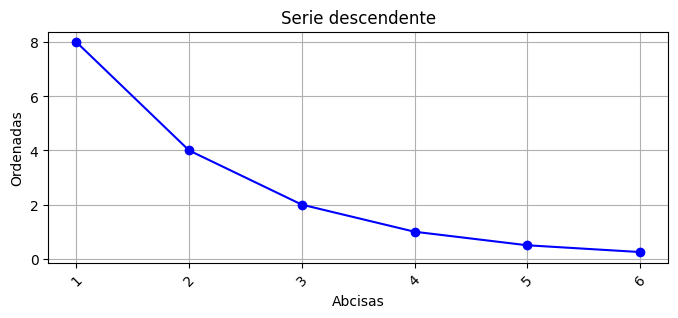

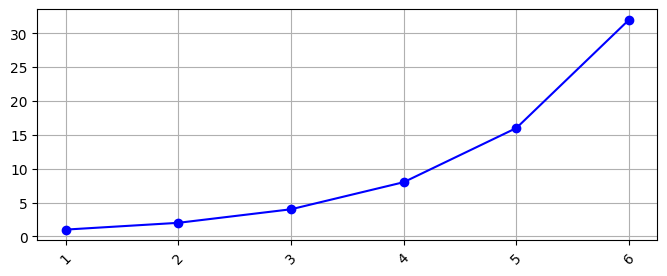

In [347]:
# Pruebas de funcionamiento:

representar_xxx_yyy([(1, 8), (2, 4), (3, 2), (4, 1), (5, 0.5), (6, 0.25)], ["Serie descendente", "Ordenadas", "Abcisas"])

representar_xxx_yyy([(1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32)])

### Una gráfica concreta

Deseamos representar el número de películas de nuestra base de datos que se han producido en un intervalo de años dado.

In [348]:
# Esta celda debe ser completada por el estudiante
from typing import List, Tuple
import matplotlib.pyplot as plt

def repr_movies_years(data: List[Tuple[int, float]], bottom_year: int, top_year: int):
    """
    Genera una gráfica de líneas que muestra el número de películas por año en un rango específico.
    
    Parámetros:
    - data (List[Tuple[int, float]]): Lista de tuplas donde cada tupla contiene un año y un valor (no necesariamente el número de películas).
    - bottom_year (int): Año inferior del rango a considerar en la gráfica.
    - top_year (int): Año superior del rango a considerar en la gráfica.
    """
    
    # Genera el diccionario de recuento de películas por año en el rango especificado.
    output = years_num_movies(data=data, bottom_year=bottom_year, top_year=top_year)
    
    # Extrae los años (eje x) y el número de películas (eje y) del diccionario de resultados.
    x_values = list(output.keys())
    y_values = list(output.values())
    
    # Crea la figura para la gráfica con un tamaño ajustado.
    plt.figure(figsize=(8, 3))
    
    # Dibuja la línea de la gráfica, sin marcadores en cada punto.
    plt.plot(x_values, y_values, marker='', linestyle='-', color='b')
    # Configura el título y las etiquetas de los ejes.
    plt.title('Number of movies in our database')
    plt.xlabel('years')
    plt.ylabel('num. movies in years')
    
    # Activa la cuadrícula para facilitar la lectura de los valores.
    plt.grid()
    
    # Muestra la gráfica resultante.
    plt.show()



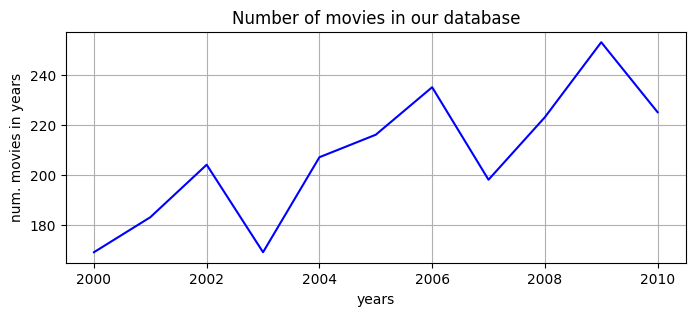

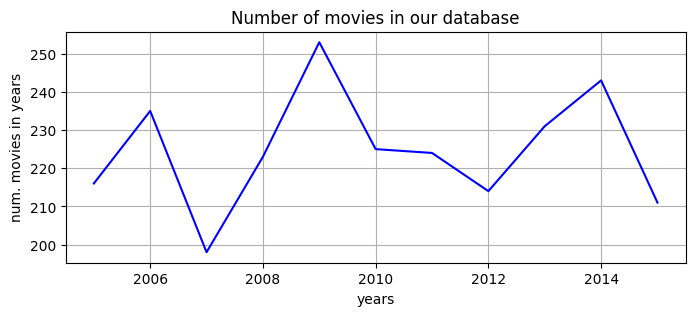

In [349]:
# Test de funcionamiento

repr_movies_years(main_dict_data, 2000, 2010)
repr_movies_years(main_dict_data, 2005, 2015)

# D. Acceso a las urls de imdb y webscraping [2 puntos]

### D.1. Recuperación de las URLs

Con sencillas instrucciones, deseamos recuperar todas las *urls* de las películas de nuestro archivo, mostrando cuántas son, la primera de ellas o las diez primeras por ejemplo:

In [350]:
# Esta celda debe ser completada por el estudiante

urls = [item[movie_imdb_link_index] for item in main_dict_data.values()]
first_url_movie = urls[0]
first_ten_urls = urls[:10]


In [351]:
# Test de funcionamiento

print(len(urls))

print()

print(first_url_movie)

print()

print(first_ten_urls)

4919

http://www.imdb.com/title/tt0499549/

['http://www.imdb.com/title/tt0499549/', 'http://www.imdb.com/title/tt0449088/', 'http://www.imdb.com/title/tt2379713/', 'http://www.imdb.com/title/tt1345836/', 'http://www.imdb.com/title/tt5289954/', 'http://www.imdb.com/title/tt0401729/', 'http://www.imdb.com/title/tt0413300/', 'http://www.imdb.com/title/tt0398286/', 'http://www.imdb.com/title/tt2395427/', 'http://www.imdb.com/title/tt0417741/']


In [352]:
# Una forma de evitar el error "Requests 403 forbidden" al hacer web scraping en las siguientes celdas:

HEADERS = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Accept-Encoding": "gzip, deflate",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Cache-Control": "max-age=0",
    }

### D.2. Carga de la estructura sintáctica de una URL

Ahora, deseamos extraer el código `html` de una película.

In [353]:
# Esta celda debe ser completada por el estudiante

import requests

def soup_movie(url: str) -> str:
    """
    Realiza una solicitud HTTP GET para obtener el código HTML de una página de película.
    
    Parámetros:
    - url (str): La URL de la página de la película que se desea obtener.
    
    Retorna:
    - str: El código HTML de la página si la solicitud es exitosa (código de estado 200).
           En caso de error, devuelve una cadena vacía y muestra un mensaje con el código de error.
    """
    
    # Realiza la solicitud HTTP GET con los encabezados definidos en `HEADERS`.
    response = requests.get(url, headers=HEADERS, verify=False)
    
    # Verifica si la solicitud fue exitosa (código de estado 200).
    if response.status_code == 200:
        return response.text  # Devuelve el contenido HTML de la página.
    else:
        # Muestra un mensaje de error con el código de estado si la solicitud falla.
        print(f"Error {response.status_code}: Unable to fetch the page.")
        return ""  # Retorna una cadena vacía si no se pudo obtener la página.



In [359]:
# Test de funcionamiento

soup = soup_movie(first_url_movie)

print(str(soup)[:1000])
print()
print("... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...")
print()
print(str(soup)[-1000:])

d:\Master\Primer_Cuatri\Python_Model\python_project\.env\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.imdb.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<!DOCTYPE html><html lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1730186101442);
        }
    })</script><title>Avatar (2009) - IMDb</title><meta name="description" content="Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following

### D.3. Extracción de algunas piezas de información de una URL

Y ahora, con dicho código, deseamos extraer la siguiente información, referida a la película `first_url_movie`:

- La etiqueta completa del título de la película
- La descripción (sólo el contenido).
- La lista de los actores del *reparto principal*
- La información sobre el presupuesto

In [372]:
from bs4 import BeautifulSoup
from typing import List, Optional

def get_title(soup: BeautifulSoup) -> Optional[str]:
    """
    Extrae el título de la página.
    """
    title_tag = soup.find('title')
    return title_tag.text if title_tag else None

def get_description(soup: BeautifulSoup) -> Optional[str]:
    """
    Extrae la descripción de la página desde la metaetiqueta.
    """
    description_tag = soup.find('meta', {'name': 'description'})
    return description_tag.get('content') if description_tag else None

def get_main_characters(soup: BeautifulSoup) -> List[str]:
    """
    Extrae una lista de nombres de personajes principales de los enlaces con una clase específica.
    """
    return [item.get_text(strip=True) for item in soup.find_all('a', {'class': 'sc-cd7dc4b7-1 kVdWAO'})]

def get_budget(soup: BeautifulSoup) -> Optional[int]:
    """
    Extrae el presupuesto de la película, en función del idioma (puede estar en inglés "Budget" o en español "Presupuesto").
    """
    # Intenta encontrar el contenedor del presupuesto en inglés
    budget_container = soup.find('', string='Budget')
    # Si no está en inglés, busca el contenedor en español
    if not budget_container:
        budget_container = soup.find('', string='Presupuesto')
    
    # Extrae el valor del presupuesto si el contenedor fue encontrado
    if budget_container:
        budget_value = budget_container.find_next('span', {'class': 'ipc-metadata-list-item__list-content-item'})
        budget_int = int(budget_value.text.split(' ')[0].split('$')[1].replace(',',''))
        return budget_int
    return None

# Ejemplo de uso con el objeto `soup` ya cargado
soup_obj = BeautifulSoup(soup)  # Asegúrate de tener el HTML en `soup_html_content`
title = get_title(soup_obj)
description = get_description(soup_obj)
main_characters = get_main_characters(soup_obj)
budget_int = get_budget(soup_obj)

print(f'Title: {title}')
print(f'Description: {description}')
print(f'Main characters: {main_characters}')
print(f'Presupuesto estimado: {budget_int}$ ')




Title: Avatar (2009) - IMDb
Description: Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.
Main characters: ['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Michelle Rodriguez', 'Stephen Lang', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence', 'Kelly Kilgour', 'James Patrick Pitt', 'Sean Patrick Murphy']
Presupuesto estimado: 237000000$ 


### D.4. Actores que intervienen en una lista de URLs

Necesitamos crear un archivo con los actores del reparto principal de las películas de IMDB, dada la lista de sus URLs.

In [379]:
# Esta celda debe ser completada por el estudiante

def gather_actors(path:str, urls:List[str]):
    with open(path,mode= '+w',encoding='utf-8') as file:
        for url in urls:
            soup = soup_movie(url )
            soup_obj = BeautifulSoup(soup)
            main_characters = get_main_characters(soup=soup_obj)
            file.write('\n'.join(main_characters))
        


In [380]:
# Test de funcionamiento

# OJO: esta operación puede llevar bastante tiempo.
# Para esta prueba, usamos un número limitado de películas.

gather_actors(path="actors_3_first_movies.txt", urls=urls[:3])

! type actors_3_first_movies.txt

d:\Master\Primer_Cuatri\Python_Model\python_project\.env\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.imdb.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
d:\Master\Primer_Cuatri\Python_Model\python_project\.env\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.imdb.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
d:\Master\Primer_Cuatri\Python_Model\python_project\.env\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.imdb.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#t

Sam Worthington
Zoe Saldana
Sigourney Weaver
Michelle Rodriguez
Stephen Lang
Giovanni Ribisi
Joel David Moore
CCH Pounder
Wes Studi
Laz Alonso
Dileep Rao
Matt Gerald
Sean Anthony Moran
Jason Whyte
Scott Lawrence
Kelly Kilgour
James Patrick Pitt
Sean Patrick MurphyJohnny Depp
Orlando Bloom
Keira Knightley
Geoffrey Rush
Jack Davenport
Bill Nighy
Jonathan Pryce
Lee Arenberg
Mackenzie Crook
Kevin McNally
David Bailie
Stellan Skarsgård
Tom Hollander
Naomie Harris
Martin Klebba
David Schofield
Lauren Maher
Dermot KeaneyDaniel Craig
Christoph Waltz
Léa Seydoux
Ralph Fiennes
Monica Bellucci
Ben Whishaw
Naomie Harris
Dave Bautista
Andrew Scott
Rory Kinnear
Jesper Christensen
Alessandro Cremona
Stephanie Sigman
Tenoch Huerta
Adriana Paz
Domenico Fortunato
Marco Zingaro
Stefano Elfi DiClaudia


d:\Master\Primer_Cuatri\Python_Model\python_project\.env\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.imdb.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
d:\Master\Primer_Cuatri\Python_Model\python_project\.env\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.imdb.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
d:\Master\Primer_Cuatri\Python_Model\python_project\.env\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.imdb.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#t

Tiempo invertido: 1.2130491733551025 segundos.


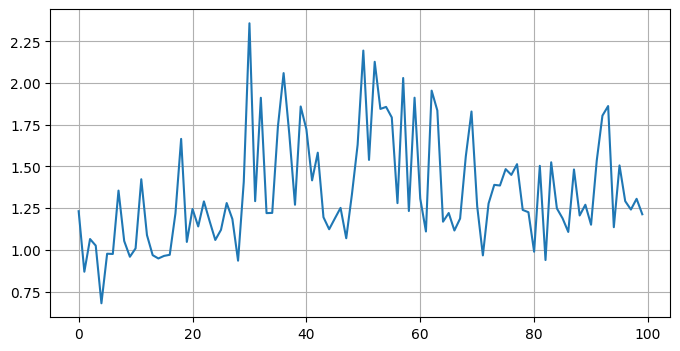

In [387]:
# La siguente llamada llevaría un tiempo realmente largo:

import time 
# para cronometrar esta función, que tarda mucho

path="actors_3_first_movies.txt"
list_time_sec = list()
max_index = 100

with open(path,mode= '+w',encoding='utf-8') as file:
    for index, url in enumerate(urls):
        #Salimos del bucle cuando veamos que hemos llegado al tamaño muestral deseado
        if(index >= max_index):
            break
        # Para cada url de la muestra tomamos el tiempo que tardamos en "Scrapearla" + escribir en el fichero
        reloj_inicio = time.time()
        soup = soup_movie(url )
        soup_obj = BeautifulSoup(soup)
        main_characters = get_main_characters(soup=soup_obj)
        file.write('\n'.join(main_characters))
        reloj_fin = time.time()
        list_time_sec.append((reloj_fin-reloj_inicio))


plt.figure(figsize=(8,4))
plt.plot(range(max_index), list_time_sec)
plt.grid()
 

print("Tiempo invertido: %s segundos." % (reloj_fin - reloj_inicio))

En operar 4919 urls, tardaríamos aproximadamente: 1.8479885293655924 horas


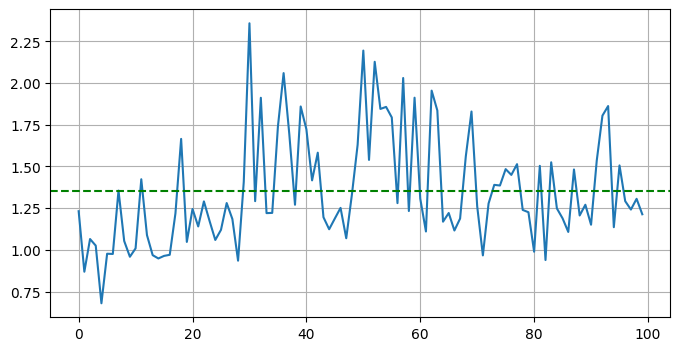

In [400]:
# Estimamos la media usando la muestra de los tiempos y estimamos
# el tiempo real que tardaríamos en realizar la operación a todas las URLs
mean_time = sum(list_time_sec)/len(list_time_sec)
final_time_hours = mean_time*len(urls)/3600
print(f'En operar {len(urls)} urls, tardaríamos aproximadamente: {final_time_hours} horas')
plt.figure(figsize=(8,4))
plt.plot(range(max_index), list_time_sec)
plt.axhline(y=mean_time, color='green', linestyle='--', label="y = 0.5")

plt.grid()

# E. Pandas [2 puntos]

### E.1. El primer paso es la carga del archivo en un dataframe

In [43]:
# Esta celda debe ser completada por el estudiante



In [44]:
# Test de funcionamiento

tabla_completa = load_dataframe(MOVIES_DATA)

tabla_completa

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


### E.2. Tabla de los campos principales

A pertir de la tabla anterior, construimos otra con sólo algumos de los campos:

In [45]:
# Esta celda debe ser completada por el estudiante



In [46]:
# test de comprobación

tabla_breve = fields_selected_dataframe(tabla_completa)

tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker,NaN,NaN,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,NaN,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


### E.3. Columnas de una tabla

¿Cuáles son las columnas de nuestrsa `tabla_breve`?

In [47]:
# Esta celda debe ser completada por el estudiante



Index(['movie_title', 'color', 'director_name', 'language', 'country',
       'actor_1_name', 'movie_imdb_link'],
      dtype='object')

### E.4. Campos missing

Algunos campos muestran un valod `NaN`. Deseamos cambiarlo por una cadena de caracteres: `"Desc"`.

In [48]:
# Esta celda debe ser completada por el estudiante



In [49]:
# Test de comprobación

tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,Desc,Doug Walker,Desc,Desc,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,Desc,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


### E.5. Director $\rightarrow$ películas y número de películas

Función que averigua la lista de títulos de películas de un director dado:

In [50]:
# Esta celda debe ser completada por el estudiante



In [51]:
# Test de comprobación:

tabla_tits = titulos_de_director_df(tabla_breve, "James Cameron")
tabla_tits

,movie_title
0,Avatar
26,Titanic
288,Terminator 2: Judgment Day
291,True Lies
606,The Abyss
2486,Aliens
3575,The Terminator


In [52]:
list_tits = tabla_tits["movie_title"].to_list()
print(list_tits)

['Avatar\xa0', 'Titanic\xa0', 'Terminator 2: Judgment Day\xa0', 'True Lies\xa0', 'The Abyss\xa0', 'Aliens\xa0', 'The Terminator\xa0']


Deseamos saber qué directores han dirigido el máximo número de películas, junto con ese número de películas.

In [53]:
# Esta celda debe ser completada por el estudiante



In [54]:
# test de comprobación:

directors_max_movies_df(tabla_breve)

(['Steven Spielberg'], 26)

# Parte F. Un cálculo masivo con map-reduce [0,5 puntos]

En este apartado se ha de realizar un programa aparte, *basado en la técnica de map-reduce*, que calcule, para cada idioma, en qué países en que se han producido películas y la suma de los presupuestos de dichas películas. Cuando el idioma o el país o el presupuesto no se conozcan, no se considerará esta película.

    C:\...> python language_budget_countries.py -q algunos_campos.txt

El programa funcionará necesariamente con la técnica map-reduce, que podemos poner en juego con la librería `mrjob`.

El funcionamiento del mismo se puede activar también desde aquí:

In [55]:
# Hagamos una llamada al programa de consola desde aquí:

! python language_budget_countries.py -q algunos_campos.txt

"Aboriginal"	[["UK","Australia"],86000000]
"Arabic"	[["Turkey","Egypt","France","United Arab Emirates"],11225000]
"Aramaic"	[["USA"],30000000]
"Bosnian"	[["USA"],13000000]
"Cantonese"	[["Hong Kong","China"],154500000]
"Chinese"	[["China"],12000000]
"Czech"	[["Czech Republic"],84450000]
"Danish"	[["Denmark"],50100000]
"Dari"	[["USA","Afghanistan"],20046000]
"Dutch"	[["Netherlands"],32150000]
"Dzongkha"	[["Australia"],1800000]
"English"	[["USA","UK","New Zealand","Canada","Australia","Germany","China","New Line","France","Japan","Spain","Hong Kong","Czech Republic","South Korea","Peru","Italy","Aruba","Denmark","Libya","Belgium","Ireland","South Africa","Switzerland","Romania","West Germany","Chile","Hungary","Russia","Mexico","Panama","Greece","Netherlands","Norway","Official site","Bulgaria","Iran","Georgia","India","Thailand","Nigeria","Bahamas","Iceland","Brazil","Poland","Kyrgyzstan","Philippines"],141954875246]
"Filipino"	[["USA"],80000000]
"French"	[["France","Canada","Finland","U

In [56]:
# Para que el resultado se almacene en un archivo:

! python language_budget_countries.py -q algunos_campos.txt > language_countries_budgets.txt

La siguiente celda me permite ver tu programa cómodamente desde aquí.

In [57]:
def print_file(filename):
    with open(filename, "r") as f:
        for line in f:
            print(line, end="")
            
print_file("language_budget_countries.py")

# Parte G. Un apartado libre [0.5 puntos]

<br>

<font color="green">
Dejo este apartado a tu voluntad. Inventa tú mismo el enunciado y resuélvelo.
El enunciado deberá estar
<b>relacionado con el análisis de datos y con el tema de este proyecto</b>.
También, la idea es mostrar algún aspecto de programación en Python no contemplado o alguna técnica o librería que no has puesto en juego en los apartados anteriores. Concretamente, se valorará el uso de <b>la librería pandas</b>,
que hemos estudiado de un modo bastante sucinto en este módulo y tratado de forma insuficiente en este proyecto de programación,
o quizá puedes también usar alguna otra librería gráfica,
distinta de matplotlib.
    
En la evaluación, si este apartado está bien o muy bien, anota un 0,3 o 0,4. El 0,5 lo reservaremos para las situaciones en que se presente algo brillante, con alguna idea original o alguna técnica novedosa o complejidad especial o algún gráfico vistoso. Especialmente quien opta a un 9,5 o más, debe esmerarse en plantear este apartado a la altura de esa calificación.
</font>

<br>

<font color="darkblue">
Tras eliminar el párrafo anterior, en verde, sustituye éste por tu enunciado, cuya fuente aparecerá en azul oscuro.
</font>

In [58]:
# Este apartado debe ser completado por el estudiante



In [59]:
# Pruebas de funcionamiento, también tarea del estudiante:



# Datos personales

<br>

<font color="darkblue">

-   **Apellidos:**  Fernánadez Lucas
-   **Nombre:** Pablo
-   **Email:** pablofernandelu@gmail.com
-   **Fecha:** 14/11/2024

<br>

<font color="black">
    
### Ficha de autoevaluación

<br>

<font color="green">
Aquí vienen comentarios del estudiante. Lo siguiente es un ejemplo posible obviamente ... elimina este párrafo y redacta el tuyo propio, en azul.
</font>

<br>

<font color="darkblue">
    
|Apartado|Calificación|Comentario|
|-|-|-|
|a)  |2.0  / 2.5  |Completamente resuelto |
|b)  |0.0  / 2.0  |No lo he conseguido |
|c)  |0.0  / 1.5  |No he entendido el enunciado |
|d)  |0.25 / 1.0  |Sólo he conseguido una parte mínima |
|e)  |0.0  / 2.0  |No lo he conseguido |
|f)  |0.5  / 0.5  |No lo he conseguido más que mínimamente |
|g)  |0.0  / 0.5  |No he logrado el correcto funcionamiento |
|**Total** |**2.75** / 10.0|**Suspenso**|
</font>

<br>

<font color="black">
   
### Ayuda recibida y fuentes utilizadas
    
</font>

<br>

<font color="green">
... comentarios del estudiante ...
Pon tú este párrafo con tus propias observaciones. Elimina este párrafo en verde.
</font>

<br>

<font color="black">
    
### Comentario adicional

</font>

<br>

<font color="green">
... Este apartado es optativo. Si lo completas, ponlo en azul; si no, suprímelo con su título.

<br>

In [ ]:
# Esta celda se ha de respetar: está aquí para comprobar
# el funcionamiento de algunas funciones por parte de tu profesor
